# LeNet
![LeNet Architecture](lenet.png)


# Load the data
Load the  data set, which come preloded with tesorflow

In [1]:
import pickle
import csv
import numpy as np
import time

tranning_file = 'datasets/traffic-signs-data/train.p'
validation_file = 'datasets/traffic-signs-data/valid.p'
test_file = 'datasets/traffic-signs-data/test.p'
signname_file = 'datasets/signnames.csv'

with open(tranning_file,mode='rb') as f:
    train_data = pickle.load(f)
with open(validation_file,mode='rb') as f:
    valid_data = pickle.load(f)
with open(test_file,mode='rb') as f:
    test_data = pickle.load(f)
with open(signname_file) as f:
    f.readline()
    signname = [row[1] for row in csv.reader(f)]

X_train, y_train = train_data['features'], train_data['labels']
X_valid, y_valid = valid_data['features'], valid_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

assert(len(X_train)==len(y_train))
assert(len(X_valid)==len(y_valid))
assert(len(X_test)==len(y_test))


In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
# n_classes = len(signnames)
n_classes = np.unique(y_train).size;


print("Number of training examples =", n_train)
print("Number of valid examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of valid examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


# Visiaulize the Data
View a sample from the dataset

In [3]:
import pandas as pd
# Load sign names file

sign_names = pd.read_csv(signname_file)
sign_names.set_index("ClassId")

sign_names.head(n=3)

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)


In [4]:
import import_ipynb
from helper import *
X_train_id_to_label = group_img_id_to_lable(y_train, sign_names)

# Let's print a few of those mappings now
X_train_id_to_label.head(n=5)

importing Jupyter notebook from helper.ipynb


,img_id,label_id,label_name
0,0,41,End of no passing
1,1,41,End of no passing
2,2,41,End of no passing
3,3,41,End of no passing
4,4,41,End of no passing


(32, 32, 3)
33
5
2
2
25


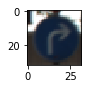

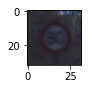

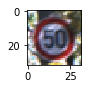

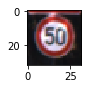

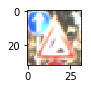

In [5]:
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
print(X_train[1].shape)

for i in range(5):
    index = random.randint(0,len(X_train))
    image = X_train[index].squeeze()
    label = y_train[index]
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    print(label)


## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

In [6]:
import tensorflow as tf
EPOCHS=50
BATCH_SIZE=128

## SOLUTION:  LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.


### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Relu activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Relu activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Relu activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Relu activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [7]:
from tensorflow.contrib.layers import flatten

def LeNet(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    #Layer 1 - Convolution Input 32x32x3, Output 28x28x6
    conv1_W=tf.Variable(tf.truncated_normal(shape=(5,5,1,6),mean=mu,stddev=sigma))
    conv1_b=tf.Variable(tf.zeros(6))
    conv1=tf.nn.conv2d(x,conv1_W,strides=[1,1,1,1],padding='VALID')+conv1_b
    
    # Activation Relu
    conv1=tf.nn.relu(conv1)
    
    #  Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    
     #Layer 2 - Convolution Input 14x14x6, Output 10x10x16
    conv2_W=tf.Variable(tf.truncated_normal(shape=(5,5,6,16),mean=mu,stddev=sigma))
    conv2_b=tf.Variable(tf.zeros(16))
    conv2=tf.nn.conv2d(conv1,conv2_W,strides=[1,1,1,1],padding='VALID')+conv2_b
    
    # Activation Relu
    conv2=tf.nn.relu(conv2)
    
    #  Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    
      #  Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)
    
    
    #  Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W=tf.Variable(tf.truncated_normal(shape=(400,120),mean=mu,stddev=sigma))
    fc1_b=tf.Variable(tf.zeros(120))
    fc1=tf.matmul(fc0,fc1_W)+fc1_b
    
    
    #Activation Relu
    fc1=tf.nn.relu(fc1)
    
    
    
     #  Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W=tf.Variable(tf.truncated_normal(shape=(120,84),mean=mu,stddev=sigma))
    fc2_b=tf.Variable(tf.zeros(84))
    fc2=tf.matmul(fc1,fc2_W)+fc2_b
    
    
    #Activation Relu
    fc2=tf.nn.relu(fc2)
    
    
     #  Layer 5: Fully Connected. Input = 84. Output = 10
        
    fc3_W=tf.Variable(tf.truncated_normal(shape=(84,43),mean=mu,stddev=sigma))
    fc3_b=tf.Variable(tf.zeros(43))
    logits=tf.matmul(fc2,fc3_W)+fc3_b
    
    return logits
    

# Preprocess the data
 shuffle the tranning data

(array([  180.,  1980.,  2010.,  1260.,  1770.,  1650.,   360.,  1290.,
         1260.,  1320.,  1800.,  1170.,  1890.,  1920.,   690.,   540.,
          360.,   990.,  1080.,   180.,   300.,   270.,   330.,   450.,
          240.,  1350.,   540.,   210.,   480.,   240.,   390.,   690.,
          210.,   599.,   360.,  1080.,   330.,   180.,  1860.,   270.,
          300.,   210.,   210.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

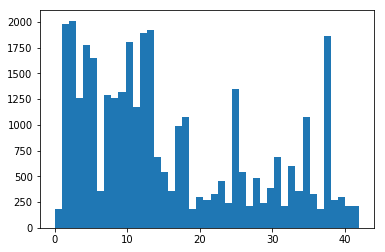

In [8]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import random
# Visualizations will be shown in the notebook.
%matplotlib inline
plt.hist(y_train, bins=43)

In [9]:
from scipy import ndimage
import random
n_class = 43
# Genrate Addtional Data

images_in_class = np.bincount(y_train)
print(images_in_class)

# Find the mean 
images_mean = int(np.mean(images_in_class))
print(images_mean)

# Generating new data to balance the datasets
#Angles used to rotate the images
angles =[10,-10,15,-15,20,-20]

# Iteate throught each classes
for i in range(n_class):
    
    if images_in_class[i]<images_mean:
    #Find the delta
        delta = images_mean-(images_in_class[i])
        picture = np.where(y_train==i)

        more_X=[]
        more_Y=[]


        for num in range(delta):

          #rotate the image and add to more_X and class to more_y
          more_X.append(ndimage.rotate(X_train[picture][random.randint(0,images_in_class[i]-1)],random.choice(angles),reshape=False))
          #Appned the pictures generated back to each class to original data
          more_Y.append(i)

    X_train = np.append(X_train,np.array(more_X),axis=0)
    y_train = np.append(y_train, np.array(more_Y),axis=0)
# Addtional data genrated
print('Additional data generated..')
  

[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]
809
Additional data generated..


(array([ 3954.,  1980.,  2010.,  1260.,  1770.,  1650.,  3952.,  1290.,
         1260.,  1320.,  1800.,  1170.,  1890.,  1920.,   809.,   809.,
         1707.,   990.,  1080.,   809.,   809.,   809.,   809.,   809.,
         1378.,  1350.,   809.,   809.,   809.,   809.,   809.,   809.,
          809.,   809.,  1258.,  1080.,   809.,  1438.,  1860.,   809.,
          809.,   809.,   809.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

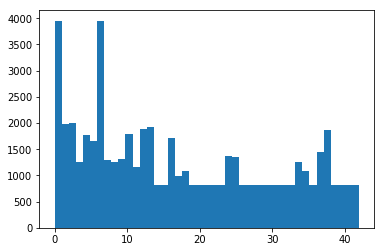

In [10]:
plt.hist(y_train, bins = 43)

In [11]:
## Preprocess the data
import cv2
def normalize(image_data):
    return image_data.astype(np.float32)/128.-1.
def grayscale(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image
def preprocess(data):
    gray_images=[]
    for image in data:
        gray_img=grayscale(image)
        gray_images.append(gray_img)
    print("Gray scale conversion completed")
    return np.array(gray_images)

    

In [12]:
from numpy import newaxis
X_train = preprocess(X_train)
X_train = X_train[..., newaxis]
x_train = normalize(X_train)

X_test = preprocess(X_test)
X_test = X_test[..., newaxis]
X_test = normalize(X_test)

# X_valid = preprocess(X_valid)
# X_valid = X_valid[..., newaxis]
# X_valid = normalize(X_valid)

print("Shape of Image = {}".format(X_train[0].shape))

Gray scale conversion completed
Gray scale conversion completed
Shape of Image = (32, 32, 1)


In [13]:
# Splitting the training dataset into training and validation data
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Shuffle the data prior to splitting
X_train, y_train = shuffle(X_train, y_train)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify = y_train, test_size=0.1, random_state=23)

print('Dataset successfully split for training and validation.')

print("Number of training examples = {}" .format(n_train))
print("Number of valid examples = {}" .format(n_validation))
print("Number of testing examples = {}" .format(n_test))


Dataset successfully split for training and validation.
Number of training examples = 34799
Number of valid examples = 4410
Number of testing examples = 12630


## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.


In [14]:
import tensorflow as tf
x = tf.placeholder(tf.float32,shape=(None,32,32,1))
y=tf.placeholder(tf.int32,None)
one_hot_y=tf.one_hot(y,43)


## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

In [16]:
learning_rate=0.001
logits = LeNet(x)
cross_entropy =tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation = optimizer.minimize(loss_operation)

# Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.


In [17]:
correct_prediction = tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

def evaluate(X_data, y_data,batch_size):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0.0
    sess = tf.get_default_session()
    
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        # Compute both accuracy and loss for this batch
        accuracy = sess.run(accuracy_operation,
                            feed_dict={x: batch_x, y: batch_y}
                           )
        
        loss = sess.run(loss_operation,
                        feed_dict={x: batch_x, y: batch_y}
                       )
        # Weighting accuracy by the total number of elements in batch
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
        
    # To produce a true mean accuracy over whole dataset
    return (total_accuracy / num_examples,total_loss/num_examples)
             

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [20]:
def train_model(X_train_features,y_train_labels,X_valid_features,y_valid_labels,batch_size,epochs=10,print_freq=1):
    
    # Create our array of metrics    
    training_metrics = np.zeros((epochs, 3))
    validation_metrics = np.zeros((epochs, 3))
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train_features)

        print("Training {0} [epochs={1}, batch_size={2}]...\n".format("Tranning", epochs, batch_size))

        for i in range(epochs):
            start_time=time.time()

            X_train, y_train = shuffle(X_train_features, y_train_labels)
            for offset in range(0, num_examples, batch_size):
                end = offset + batch_size
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            end_training_time = time.time()
            training_duration = end_training_time - start_time

            end_epoch_time = time.time()            
            validation_duration = end_epoch_time - end_training_time   
            epoch_duration = end_epoch_time - start_time


            #Computing Tranning accuracy and tranning loss
            training_accuracy,training_loss = evaluate(X_train, y_train,batch_size)
            validation_accuracy,validation_loss = evaluate(X_valid_features, y_valid_labels,batch_size)

            if i==0 or (i+1)%print_freq==0:
                print("[{0}]\ttotal={1:.3f}s | train: time={2:.3f}s, loss={3:.4f}, acc={4:.4f} | val: time={5:.3f}s, loss={6:.4f}, acc={7:.4f}".format(
                              i+1, epoch_duration, training_duration, training_loss, training_accuracy, 
                            validation_duration, validation_loss, validation_accuracy))
            training_metrics[i] = [training_duration, training_loss, training_accuracy]
            validation_metrics[i] = [validation_duration, validation_loss, validation_accuracy]
#       print("EPOCH {} ...".format(i+1))
#       print("Validation Accuracy = {:.3f} ".format(validation_accuracy))
#       print("Loss = {:.3f} ".format(tranning_loss))
#       print()

    return (training_metrics, validation_metrics, epoch_duration)


In [27]:
import time

(g_3x3_tr_metrics, g_3x3_val_metrics, g_3x3_duration)=train_model(X_train_features=X_train,y_train_labels=y_train,X_valid_features=X_valid,y_valid_labels=y_valid,batch_size=BATCH_SIZE,epochs=20)





Training Tranning [epochs=20, batch_size=128]...

[1]	total=25.603s | train: time=25.603s, loss=0.4611, acc=0.8745 | val: time=0.000s, loss=0.5026, acc=0.8630
[2]	total=24.969s | train: time=24.969s, loss=0.2721, acc=0.9284 | val: time=0.000s, loss=0.2965, acc=0.9249
[3]	total=25.491s | train: time=25.491s, loss=0.1672, acc=0.9546 | val: time=0.000s, loss=0.2074, acc=0.9449
[4]	total=25.908s | train: time=25.908s, loss=0.1110, acc=0.9703 | val: time=0.000s, loss=0.1540, acc=0.9627
[5]	total=26.768s | train: time=26.768s, loss=0.1276, acc=0.9640 | val: time=0.000s, loss=0.1824, acc=0.9537
[6]	total=26.524s | train: time=26.524s, loss=0.0671, acc=0.9803 | val: time=0.000s, loss=0.1245, acc=0.9692
[7]	total=26.633s | train: time=26.633s, loss=0.0600, acc=0.9832 | val: time=0.000s, loss=0.1236, acc=0.9685
[8]	total=26.132s | train: time=26.132s, loss=0.0595, acc=0.9836 | val: time=0.000s, loss=0.1103, acc=0.9692
[9]	total=27.038s | train: time=27.038s, loss=0.0508, acc=0.9862 | val: time=0

In [28]:
def plot_model_results(metrics, axes, lbs, xlb, ylb, titles, fig_title, fig_size=(7, 5), epochs_interval=1):
    """
    Nifty utility function to plot results of the execution of our model
    """
    fig, axs = plt.subplots(nrows=1, ncols=len(axes), figsize=fig_size)
    print("Length of axis: {0}".format(axs.shape))
    
    total_epochs = metrics[0].shape[0]
    print('total_epochs:::',total_epochs)
    x_values = np.linspace(1, total_epochs, num=total_epochs, dtype=np.int32)
    
    for m, l in zip(metrics, lbs):
        for i in range(0, len(axes)):
            ax = axs[i]
            axis = axes[i]
            ax.plot(x_values, m[:, axis], linewidth=2, label=l)
            ax.set(xlabel=xlb[i], ylabel=ylb[i], title=titles[i])
            ax.xaxis.set_ticks(np.linspace(1, total_epochs, num=int(total_epochs/epochs_interval), dtype=np.int32))
            ax.legend(loc='center right')
    
    plt.suptitle(fig_title, fontsize=14, fontweight='bold')
    plt.show()



Length of axis: (2,)
total_epochs::: 20


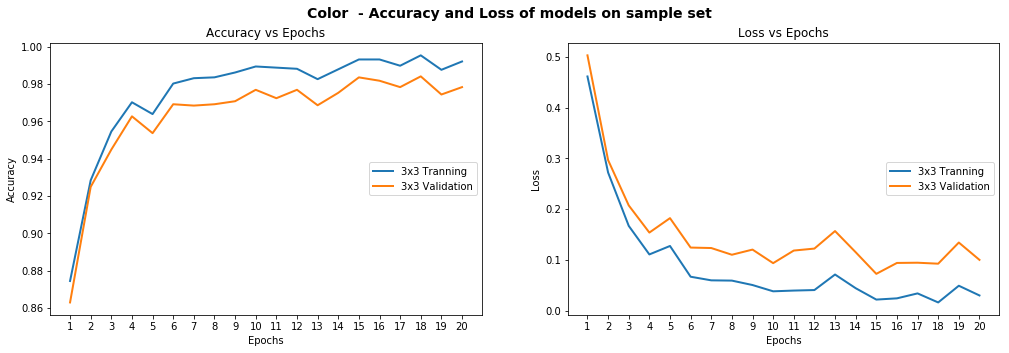

In [29]:
metrics_arr = [g_3x3_tr_metrics,g_3x3_val_metrics]
# print(g_3x3_val_metrics)
matrics_lables = ["3x3 Tranning","3x3 Validation"]
plot_model_results(metrics_arr, [2, 1], matrics_lables, ["Epochs", "Epochs"], ["Accuracy", "Loss"], 
                   ["Accuracy vs Epochs", 
                    "Loss vs Epochs"],
                   "Color  - Accuracy and Loss of models on sample set"
                    , fig_size=(17, 5))     